### Problem Statement 1

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
#Loading the dataset
data = pd.read_csv("Salesdata.csv")

In [47]:
#Group by Product Category
grouped_data = data.groupby("ProductCategory")

In [48]:
#Calculate statistics
category_purchase_stats = grouped_data["PurchaseAmount"].describe()

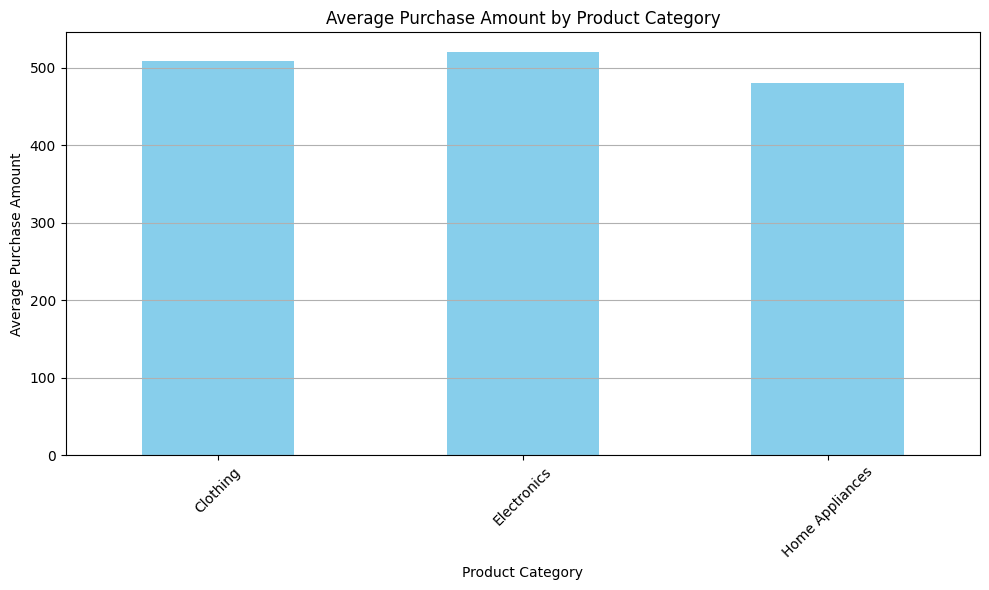

In [49]:
#Visualization
plt.figure(figsize=(10, 6))
category_purchase_stats["mean"].plot(kind="bar", color="skyblue")
plt.title("Average Purchase Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Purchase Amount")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [50]:
#Identify highest and lowest
highest_purchase_category = category_purchase_stats["mean"].idxmax()
lowest_purchase_category = category_purchase_stats["mean"].idxmin()
print("Product category with the highest average purchase amount:", highest_purchase_category)
print("Product category with the lowest average purchase amount:", lowest_purchase_category)

Product category with the highest average purchase amount: Electronics
Product category with the lowest average purchase amount: Home Appliances


C:\Users\rkrak\AppData\Local\Temp\ipykernel_27200\3215584721.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\rkrak\AppData\Local\Temp\ipykernel_27200\3215584721.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
C:\Users\rkrak\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


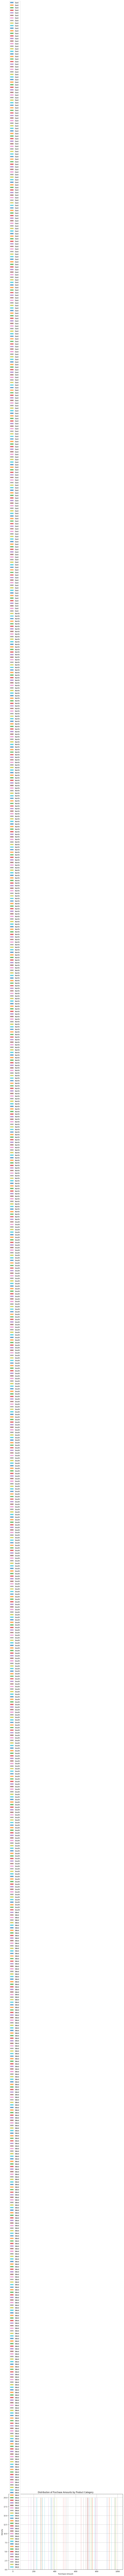

In [117]:
#Plot for each category
plt.figure(figsize=(12, 8))
for category, group in grouped_data:
    plt.hist(group["PurchaseAmount"], bins=20, alpha=0.7, label=category, density=True)
plt.title("Distribution of Purchase Amounts by Product Category")
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Problem Statement 2

In [52]:
#Group by Customer Segment
grouped_data = data.groupby("CustomerSegment")

In [53]:
#Calculate statistics
segment_rating_stats = grouped_data["Rating"].describe()

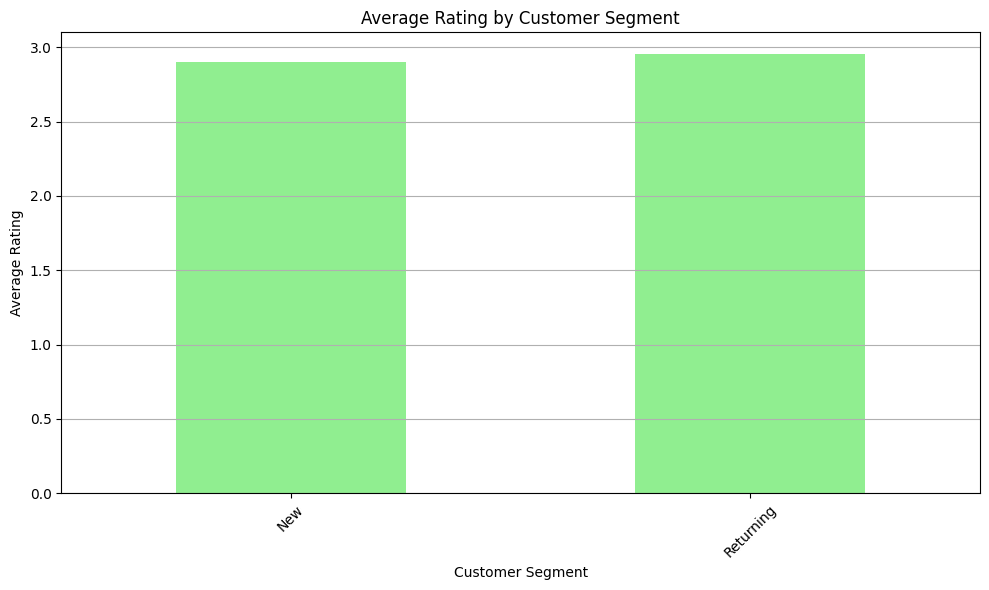

In [54]:
#Visualization
plt.figure(figsize=(10, 6))
segment_rating_stats["mean"].plot(kind="bar", color="lightgreen")
plt.title("Average Rating by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [55]:
#Identify highest and lowest
highest_rating_segment = segment_rating_stats["mean"].idxmax()
lowest_rating_segment = segment_rating_stats["mean"].idxmin()
print("Customer segment with the highest average rating:", highest_rating_segment)
print("Customer segment with the lowest average rating:", lowest_rating_segment)

Customer segment with the highest average rating: Returning
Customer segment with the lowest average rating: New


### Problem Statement 3

In [56]:
import seaborn as sns

In [57]:
#Select numerical columns for correlation analysis
numerical_data = data[["Age", "PurchaseAmount"]]

In [58]:
#Correlation analysis
correlation = numerical_data.corr()

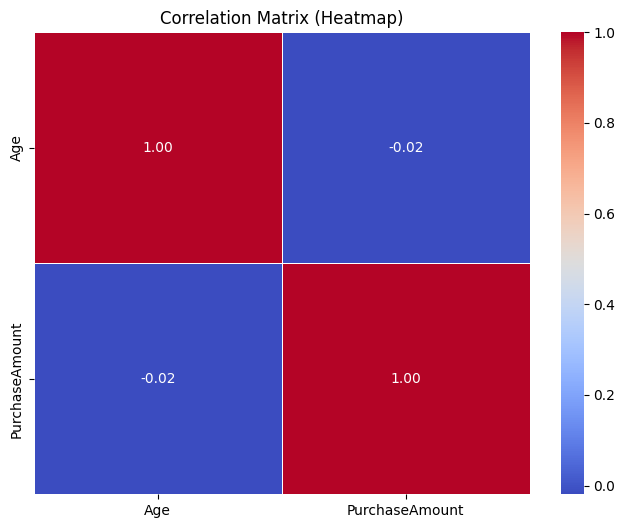

In [59]:
#Visualization - Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Heatmap)")
plt.show()

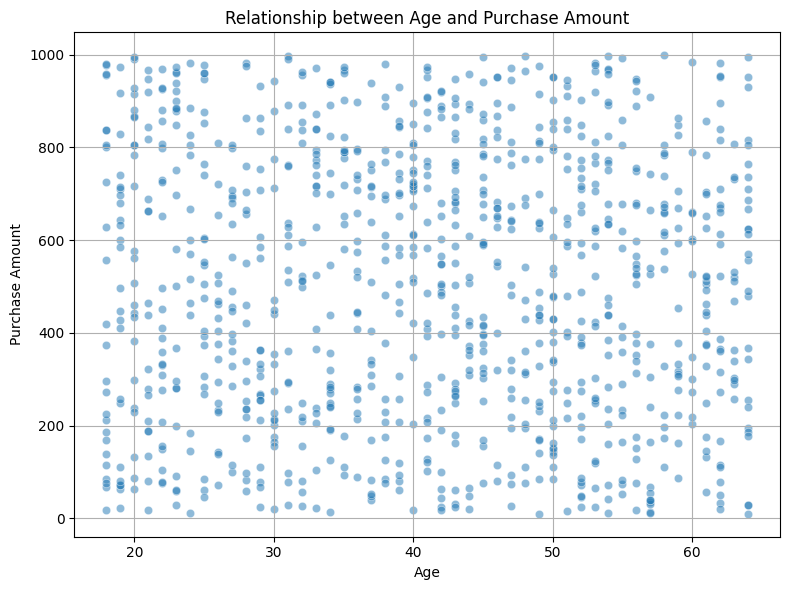

In [60]:
#Visualization - Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="Age", y="PurchaseAmount", alpha=0.5)
plt.title("Relationship between Age and Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

In [61]:
#Statistical Significance
alpha = 0.05
if abs(correlation.loc["Age", "PurchaseAmount"]) >= 0.5:
    print("The correlation between age and purchase amount is statistically significant.")
else:
    print("The correlation between age and purchase amount is not statistically significant.")

The correlation between age and purchase amount is not statistically significant.


### Problem Statement 4

In [62]:
#Count unique customers per region
unique_customers_per_region = data.groupby("Region")["CustomerID"].nunique()

In [63]:
#Total unique customers
total_unique_customers = unique_customers_per_region.sum()

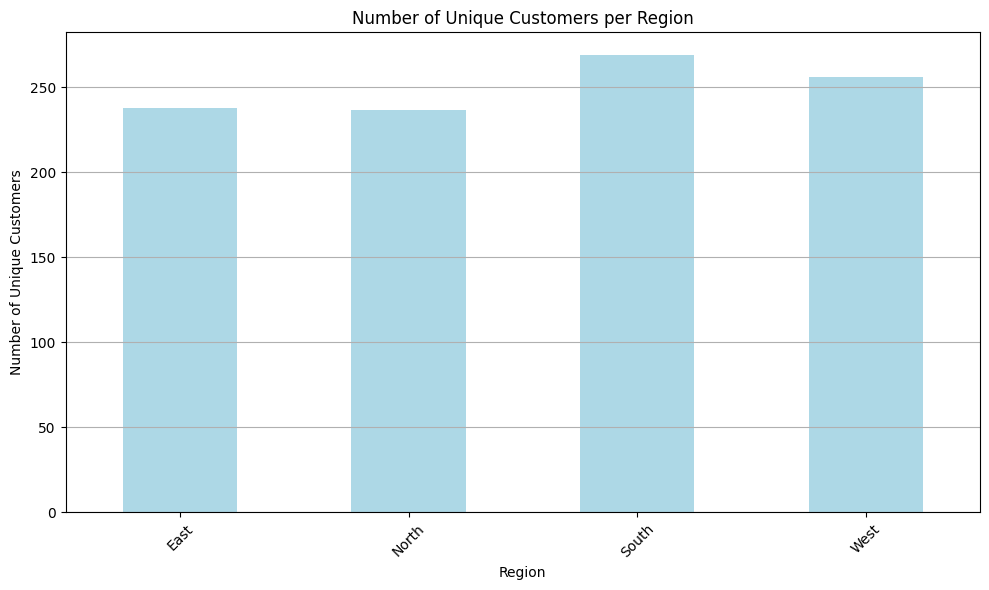

In [64]:
#Visualization
plt.figure(figsize=(10, 6))
unique_customers_per_region.plot(kind="bar", color="lightblue")
plt.title("Number of Unique Customers per Region")
plt.xlabel("Region")
plt.ylabel("Number of Unique Customers")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [65]:
#Identify highest and lowest
highest_customers_region = unique_customers_per_region.idxmax()
lowest_customers_region = unique_customers_per_region.idxmin()

print("Region with the highest number of unique customers:", highest_customers_region)
print("Region with the lowest number of unique customers:", lowest_customers_region)
print("Total number of unique customers across all regions:", total_unique_customers)

Region with the highest number of unique customers: South
Region with the lowest number of unique customers: North
Total number of unique customers across all regions: 1000


### Problem Statement 5

In [66]:
#Calculate total purchase amount per payment method
total_purchase_amount_per_method = data.groupby("PaymentMethod")["PurchaseAmount"].sum()

In [67]:
#Identify different payment methods
payment_methods = total_purchase_amount_per_method.index.tolist()

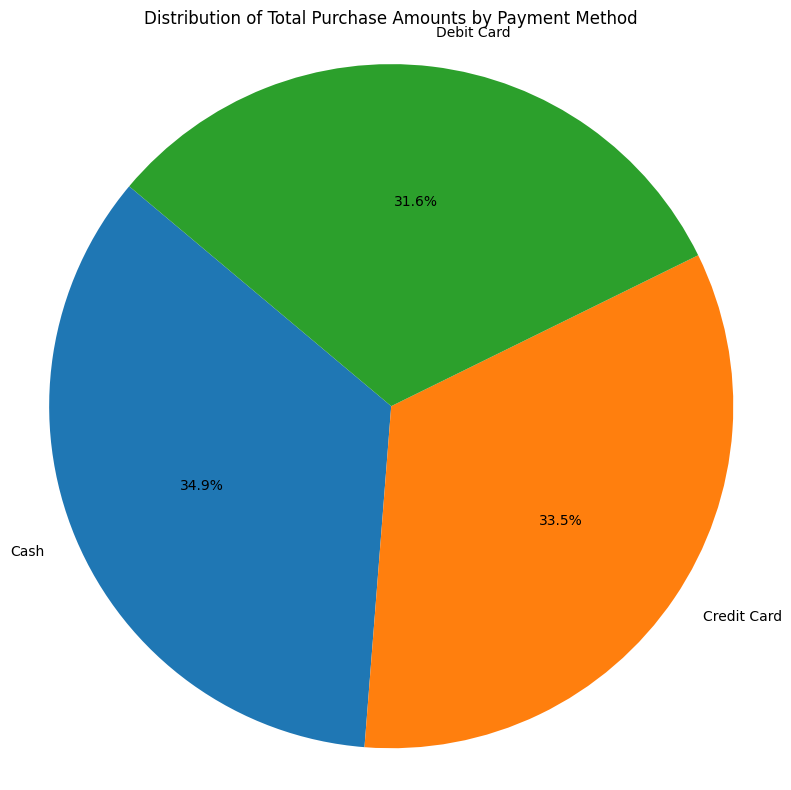

In [68]:
#Visualization - Pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_purchase_amount_per_method, labels=payment_methods, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Total Purchase Amounts by Payment Method")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [69]:
#Print total purchase amount for each payment method
print("Total purchase amount for each payment method:")
print(total_purchase_amount_per_method)

Total purchase amount for each payment method:
PaymentMethod
Cash           175209.292471
Credit Card    168436.113530
Debit Card     158874.409113
Name: PurchaseAmount, dtype: float64


### Problem Statement 6

In [70]:
#Calculate average shipping duration per location
average_shipping_duration_per_location = data.groupby("Location")["ShippingDuration"].mean()

In [71]:
#Identify different locations
locations = average_shipping_duration_per_location.index.tolist()

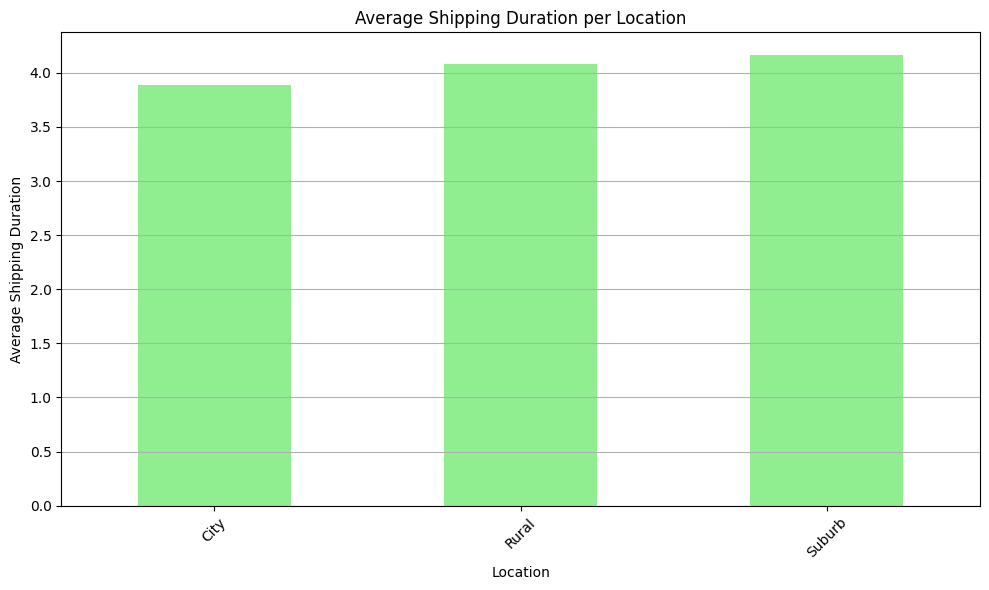

In [72]:
#Visualization - Bar plot
plt.figure(figsize=(10, 6))
average_shipping_duration_per_location.plot(kind="bar", color="lightgreen")
plt.title("Average Shipping Duration per Location")
plt.xlabel("Location")
plt.ylabel("Average Shipping Duration")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [73]:
#Print average shipping duration for each location
print("Average shipping duration for each location:")
print(average_shipping_duration_per_location)

Average shipping duration for each location:
Location
City      3.886628
Rural     4.081433
Suburb    4.166189
Name: ShippingDuration, dtype: float64


### Problem Statement 7

In [74]:
#Calculate return rate per product category
return_data = data[data["IsReturned"] == 1]
return_counts = return_data.groupby("ProductCategory").size()
total_purchase_counts = data.groupby("ProductCategory").size()

In [75]:
#Compute return rate
return_rate_per_category = (return_counts / total_purchase_counts) * 100

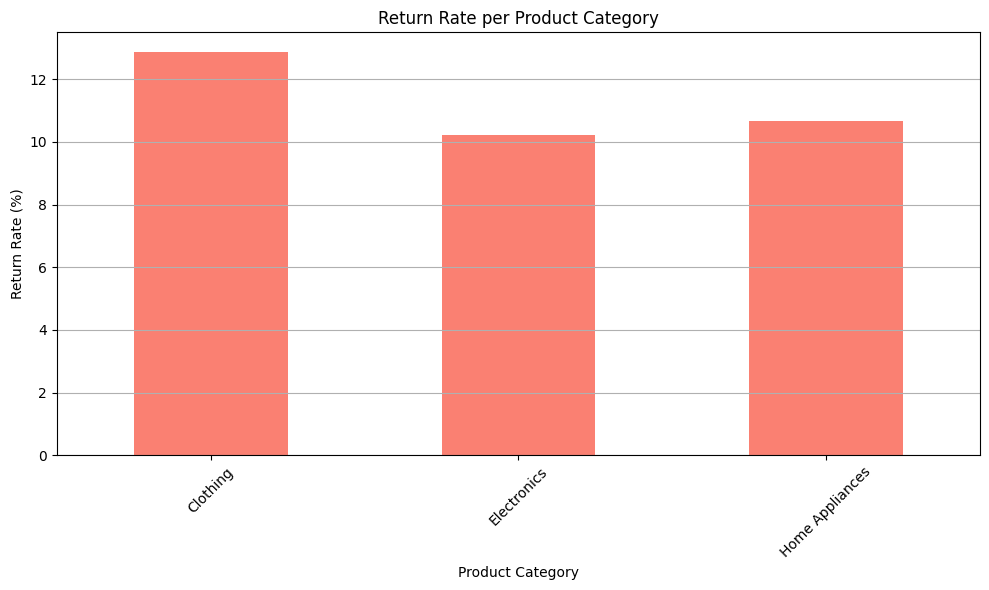

In [76]:
# Visualization - Bar plot
plt.figure(figsize=(10, 6))
return_rate_per_category.plot(kind="bar", color="salmon")
plt.title("Return Rate per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Return Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [77]:
#Print return rate and return counts for each product category
print("Return rate and return counts for each product category:")
print(pd.DataFrame({
    "Return Rate (%)": return_rate_per_category,
    "Return Counts": return_counts,
    "Total Purchases": total_purchase_counts
}))

Return rate and return counts for each product category:
                 Return Rate (%)  Return Counts  Total Purchases
ProductCategory                                                 
Clothing               12.852665             41              319
Electronics            10.204082             35              343
Home Appliances        10.650888             36              338


### Problem Statement 8

In [78]:
import scipy.stats as stats

In [79]:
#Calculate average purchase amount per gender
average_purchase_amount_per_gender = data.groupby("Gender")["PurchaseAmount"].mean()

In [80]:
#Statistical test
male_purchase_amounts = data[data["Gender"] == "Male"]["PurchaseAmount"]
female_purchase_amounts = data[data["Gender"] == "Female"]["PurchaseAmount"]

In [81]:
#Perform t-test assuming unequal variances (Welch's t-test)
t_statistic, p_value = stats.ttest_ind(male_purchase_amounts, female_purchase_amounts, equal_var=False)

<Figure size 800x600 with 0 Axes>

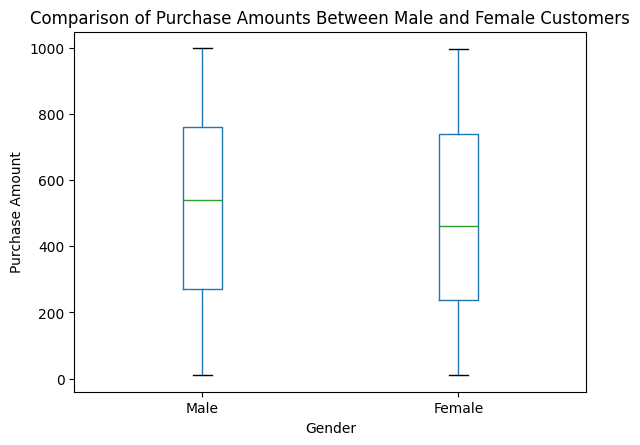

In [82]:
#Visualization - Box plot
plt.figure(figsize=(8, 6))
data.boxplot(column="PurchaseAmount", by="Gender", grid=False)
plt.title("Comparison of Purchase Amounts Between Male and Female Customers")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Purchase Amount")
plt.xticks([1, 2], ["Male", "Female"])
plt.show()

In [83]:
#Print average purchase amount for each gender and results of the statistical test
print("Average purchase amount for each gender:")
print(average_purchase_amount_per_gender)
print("\nResults of Welch's t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("The difference in purchase amounts between male and female customers is statistically significant.")
else:
    print("There is no significant difference in purchase amounts between male and female customers.")

Average purchase amount for each gender:
Gender
Female    523.24917
Male      483.83975
Name: PurchaseAmount, dtype: float64

Results of Welch's t-test:
t-statistic: -2.175701463614753
p-value: 0.02981270124678569
The difference in purchase amounts between male and female customers is statistically significant.


### Problem Statement 9

In [84]:
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'], format='%d-%m-%Y')
data['DayOfWeek'] = data['PurchaseDate'].dt.day_name()

In [112]:
data['DayOfWeek']

0       Saturday
1         Sunday
2         Monday
3        Tuesday
4      Wednesday
         ...    
995       Sunday
996       Monday
997      Tuesday
998    Wednesday
999     Thursday
Name: DayOfWeek, Length: 1000, dtype: object

In [85]:
#Calculate total purchase amount per day of the week
total_purchase_amount_per_day = data.groupby('DayOfWeek')['PurchaseAmount'].sum()

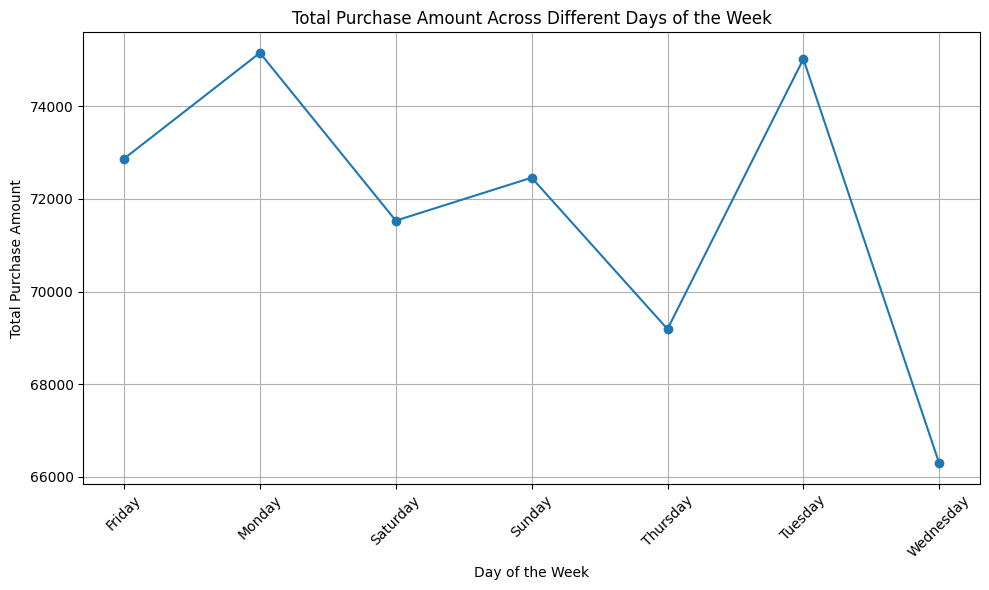

In [86]:
#Visualization - Line plot
plt.figure(figsize=(10, 6))
total_purchase_amount_per_day.plot(marker='o')
plt.title('Total Purchase Amount Across Different Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [87]:
#Statistical test
weekend_purchase_amounts = data[data['DayOfWeek'].isin(['Saturday', 'Sunday'])]['PurchaseAmount']
weekday_purchase_amounts = data[~data['DayOfWeek'].isin(['Saturday', 'Sunday'])]['PurchaseAmount']

In [88]:
#Perform t-test assuming unequal variances (Welch's t-test)
t_statistic, p_value = stats.ttest_ind(weekend_purchase_amounts, weekday_purchase_amounts, equal_var=False)

In [89]:
#Print results of the statistical test
print("Results of Welch's t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)
if p_value < 0.05:
    print("The difference in average purchase amount between weekends and weekdays is statistically significant.")
else:
    print("There is no significant difference in average purchase amount between weekends and weekdays.")

Results of Welch's t-test:
t-statistic: 0.06763349565409417
p-value: 0.9461018172400819
There is no significant difference in average purchase amount between weekends and weekdays.


### Problem Statement 10

In [90]:
#Create age groups
age_bins = [18, 25, 35, 45, 55, 65, 75, 100]  # Define age group boundaries
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']  # Define age group labels
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [91]:
#Calculate average purchase amount per age group
average_purchase_amount_per_age_group = data.groupby('AgeGroup')['PurchaseAmount'].mean()

C:\Users\rkrak\AppData\Local\Temp\ipykernel_27200\867348000.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_purchase_amount_per_age_group = data.groupby('AgeGroup')['PurchaseAmount'].mean()


C:\Users\rkrak\AppData\Local\Temp\ipykernel_27200\4002825836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_purchase_amount_per_age_group.index, y=average_purchase_amount_per_age_group.values, palette="viridis")


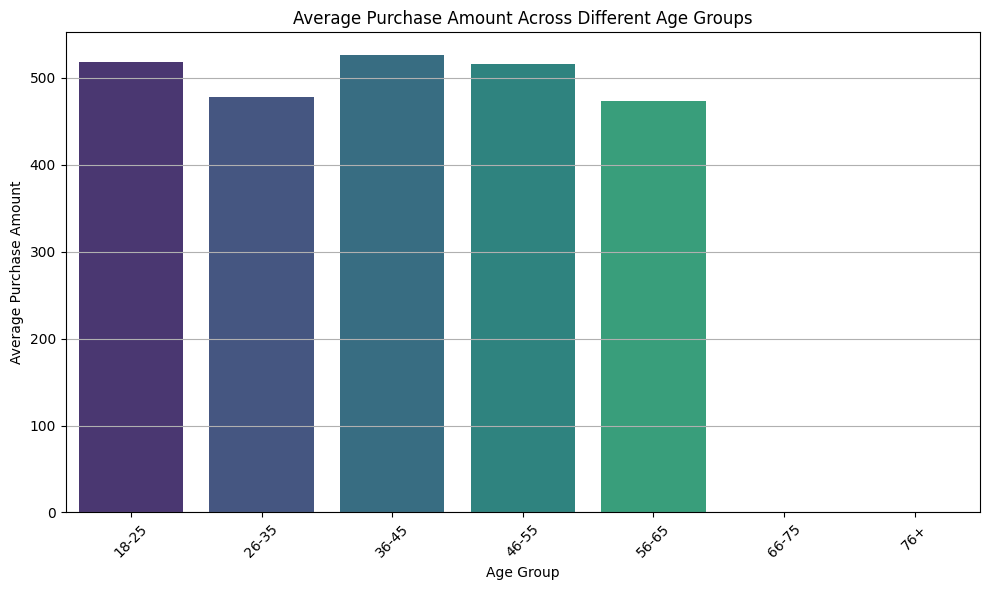

In [92]:
#Visualization - Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_purchase_amount_per_age_group.index, y=average_purchase_amount_per_age_group.values, palette="viridis")
plt.title('Average Purchase Amount Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Problem Statement 11

In [93]:
#Extract month from purchase date and create a new column
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])
data['Month'] = data['PurchaseDate'].dt.month

In [94]:
#Calculate total purchase amount per month
total_purchase_amount_per_month = data.groupby('Month')['PurchaseAmount'].sum()

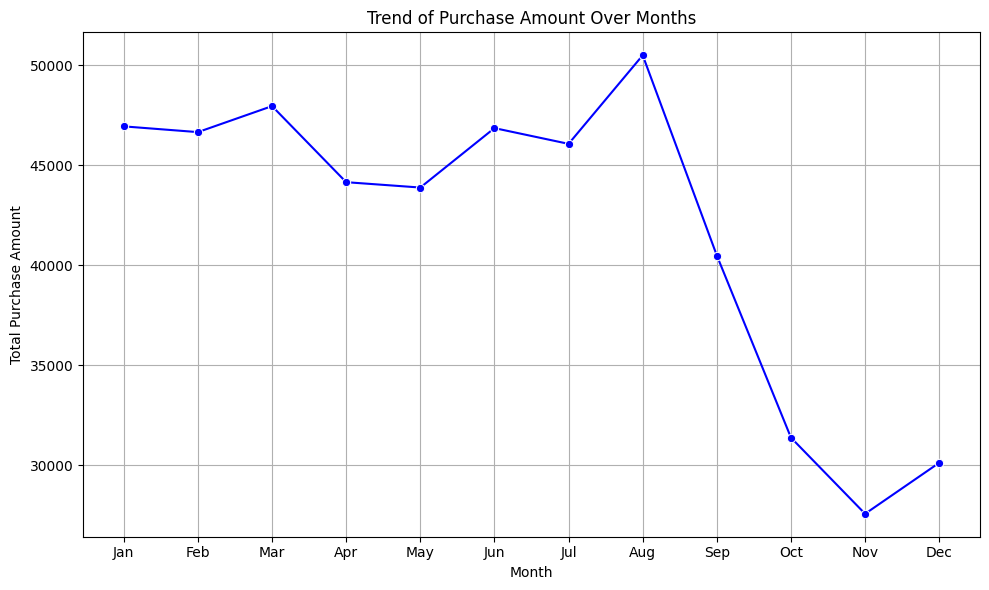

In [95]:
#Visualization - Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_purchase_amount_per_month.index, y=total_purchase_amount_per_month.values, marker='o', color='blue')
plt.title('Trend of Purchase Amount Over Months')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

### Problem Statement 12

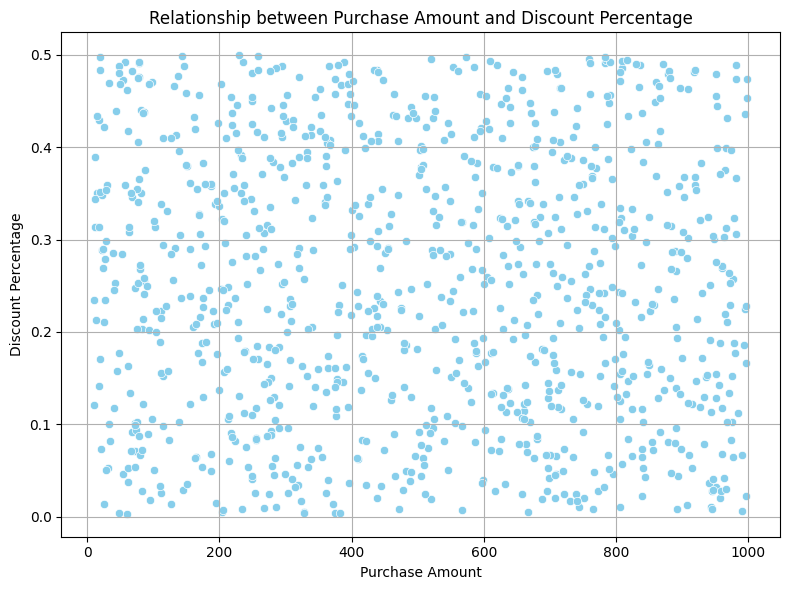

In [96]:
#Visualization - Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PurchaseAmount", y="DiscountPercentage", data=data, color="skyblue")
plt.title("Relationship between Purchase Amount and Discount Percentage")
plt.xlabel("Purchase Amount")
plt.ylabel("Discount Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
#Calculate correlation
correlation = data["PurchaseAmount"].corr(data["DiscountPercentage"])
print("Correlation between purchase amount and discount percentage:", correlation)

Correlation between purchase amount and discount percentage: -0.044352373219124795


### Problem Statement 13

In [98]:
#Group by Customer ID and Purchase Date
grouped_data = data.groupby(["CustomerID", "PurchaseDate"])

In [99]:
#Count purchases
purchase_counts = grouped_data.size().reset_index(name="PurchaseCount")

In [100]:
#Create flag column
purchase_counts["MultiplePurchases"] = purchase_counts["PurchaseCount"] > 1

In [101]:
#Filter dataset to show only records with flag column True
multiple_purchases_data = purchase_counts[purchase_counts["MultiplePurchases"]]

In [102]:
#Visualization - Bar plot
if not multiple_purchases_data.empty:
    plt.figure(figsize=(8, 6))
    multiple_purchases_data["MultiplePurchases"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
    plt.title("Customers with Multiple Purchases on the Same Day")
    plt.xlabel("Multiple Purchases")
    plt.ylabel("Count")
    plt.xticks([0, 1], ["False", "True"], rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
else:
    print("No records found where customers made multiple purchases on the same day.")

No records found where customers made multiple purchases on the same day.


In [103]:
#Display filtered dataset with customers who made multiple purchases on the same day
print("Records where customers made multiple purchases on the same day:")
print(multiple_purchases_data)

Records where customers made multiple purchases on the same day:
Empty DataFrame
Columns: [CustomerID, PurchaseDate, PurchaseCount, MultiplePurchases]
Index: []


### Problem Statement 14

In [104]:
#Create pivot table to calculate total purchase amounts for each customer segment and product category
pivot_table = pd.pivot_table(data, index="CustomerSegment", columns="ProductCategory", values="PurchaseAmount", aggfunc="sum")

In [105]:
#Sort pivot table in descending order based on total purchase amounts
sorted_pivot_table = pivot_table.loc[pivot_table.sum(axis=1).sort_values(ascending=False).index]

In [106]:
#Visualization
print("Pivot table sorted in descending order by total purchase amounts:")
print(sorted_pivot_table)

Pivot table sorted in descending order by total purchase amounts:
ProductCategory       Clothing    Electronics  Home Appliances
CustomerSegment                                               
Returning        100688.639368  107753.209241     93289.930229
New               61373.309327   70446.097719     68968.629231


### Problem Statement 15

In [107]:
#Group by Region and Customer ID
grouped_data = data.groupby(["Region", "CustomerID"])

In [108]:
#Calculate Mean Purchase Amount
average_purchase_per_customer = grouped_data["PurchaseAmount"].mean()

In [109]:
#Create New Column
data["AvgPurchasePerCustomer"] = data.apply(lambda row: average_purchase_per_customer.get((row["Region"], row["CustomerID"])), axis=1)

In [110]:
#Display Top 5 Records
top_records_per_region = data.groupby("Region").apply(lambda x: x.nlargest(5, "AvgPurchasePerCustomer"))
print("Top 5 records with the highest average purchase per customer for each region:")
print(top_records_per_region)

Top 5 records with the highest average purchase per customer for each region:
            Unnamed: 0  CustomerID  Age  Gender Location  ProductCategory  \
Region                                                                      
East   949         949         950   48  Female   Suburb         Clothing   
       236         236         237   20    Male   Suburb  Home Appliances   
       283         283         284   55  Female     City         Clothing   
       878         878         879   31  Female     City      Electronics   
       164         164         165   19    Male   Suburb      Electronics   
North  849         849         850   58  Female     City  Home Appliances   
       245         245         246   24    Male   Suburb  Home Appliances   
       23           23          24   38  Female    Rural         Clothing   
       426         426         427   47  Female     City      Electronics   
       741         741         742   22    Male     City  Home Appliances  

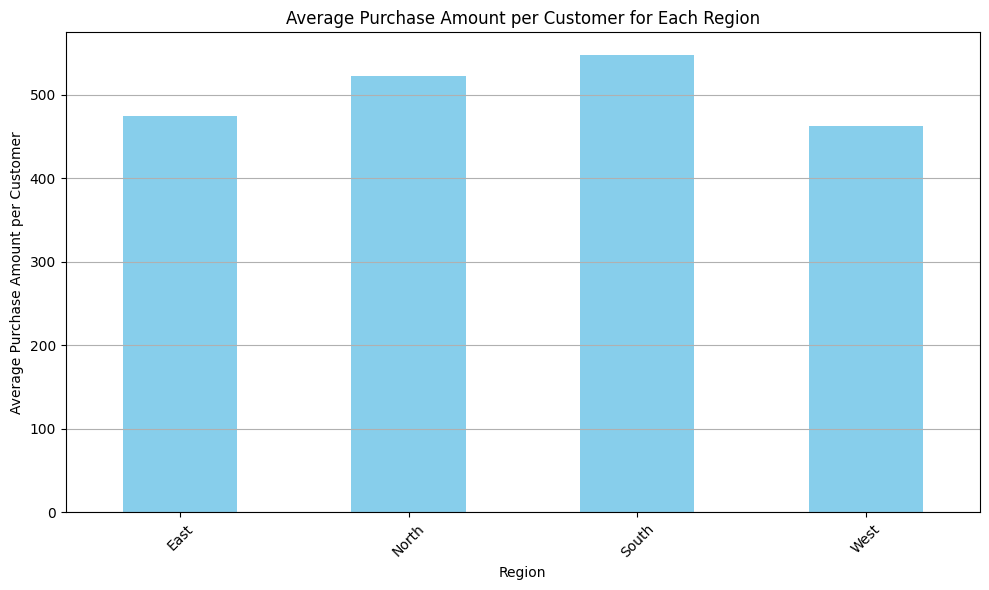

In [111]:
#Visualization - Bar plot
plt.figure(figsize=(10, 6))
data.groupby("Region")["AvgPurchasePerCustomer"].mean().plot(kind="bar", color="skyblue")
plt.title("Average Purchase Amount per Customer for Each Region")
plt.xlabel("Region")
plt.ylabel("Average Purchase Amount per Customer")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()